About Dataset

The "yahoo_finance_dataset(2018-2023)" dataset is a financial dataset containing daily stock market data for multiple assets such as equities, ETFs, and indexes. It spans from April 1, 2018 to March 31, 2023, and contains 1257 rows and 7 columns. The data was sourced from Yahoo Finance, and the purpose of the dataset is to provide researchers, analysts, and investors with a comprehensive dataset that they can use to analyze stock market trends, identify patterns, and develop investment strategies.
The dataset can be used for various tasks, including stock price prediction, trend analysis, portfolio optimization, and risk management. The dataset is provided in XLSX format, which makes it easy to import into various data analysis tools, including Python, R, and Excel.

The dataset includes the following columns:

Date: The date on which the stock market data was recorded.<br>
Open: The opening price of the asset on the given date.<br>
High: The highest price of the asset on the given date.<br>
Low: The lowest price of the asset on the given date.<br>
Close: The closing price of the asset on the given date. Note that this price does not take into account any after-hours trading that may have occurred after the market officially closed. <br>Adj Close*: The adjusted closing price of the asset on the given date. This price takes into account any dividends, stock splits, or other corporate actions that may have occurred, which can affect the stock price.
<br>Volume: The total number of shares of the asset that were traded on the given date.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [3]:
df = pd.read_excel('./data/yahoo_data.xlsx')

In [4]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [5]:
df['Date'] = pd.to_datetime(df.Date)

In [6]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1258 non-null   datetime64[ns]
 1   Open         1258 non-null   float64       
 2   High         1258 non-null   float64       
 3   Low          1258 non-null   float64       
 4   Close*       1258 non-null   float64       
 5   Adj Close**  1258 non-null   float64       
 6   Volume       1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [8]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [9]:
from scipy.stats import zscore

In [10]:
df.select_dtypes(include=['float', 'int']).describe()

,Open,High,Low,Close*,Adj Close**,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,29595.823045,29776.945739,29402.432226,29599.361677,29599.361677,3.450636e+08
std,4006.078299,4009.007573,4004.949066,4007.468822,4007.468822,1.069142e+08
min,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07
25%,26041.267500,26163.155000,25877.872500,26027.120000,26027.120000,2.773125e+08
50%,29201.410000,29335.685000,28996.500000,29199.460000,29199.460000,3.247250e+08
75%,33604.027500,33825.445000,33346.827500,33600.342500,33600.342500,3.875100e+08
max,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08


In [11]:
import matplotlib.pyplot as plt

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')

In [13]:
numerical_features = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
def boxplot_per_feature(n, m , dataset):
    fig, axes = plt.subplots(n, m, figsize=(10, 15))
    ax = axes.flatten()
    # Plot each feature against target
    for i, feature in enumerate(numerical_features):
        ax[i].boxplot(dataset[feature])
        ax[i].set_xticklabels([feature], color = 'red')  
        ax[i].set_ylabel('ranges')
        ax[i].set_title(f'{feature} Boxplot')
    # Hide any empty subplots
    for i in range(len(dataset), len(ax)):
        ax[i].set_visible(False)
    plt.tight_layout()
    plt.show()

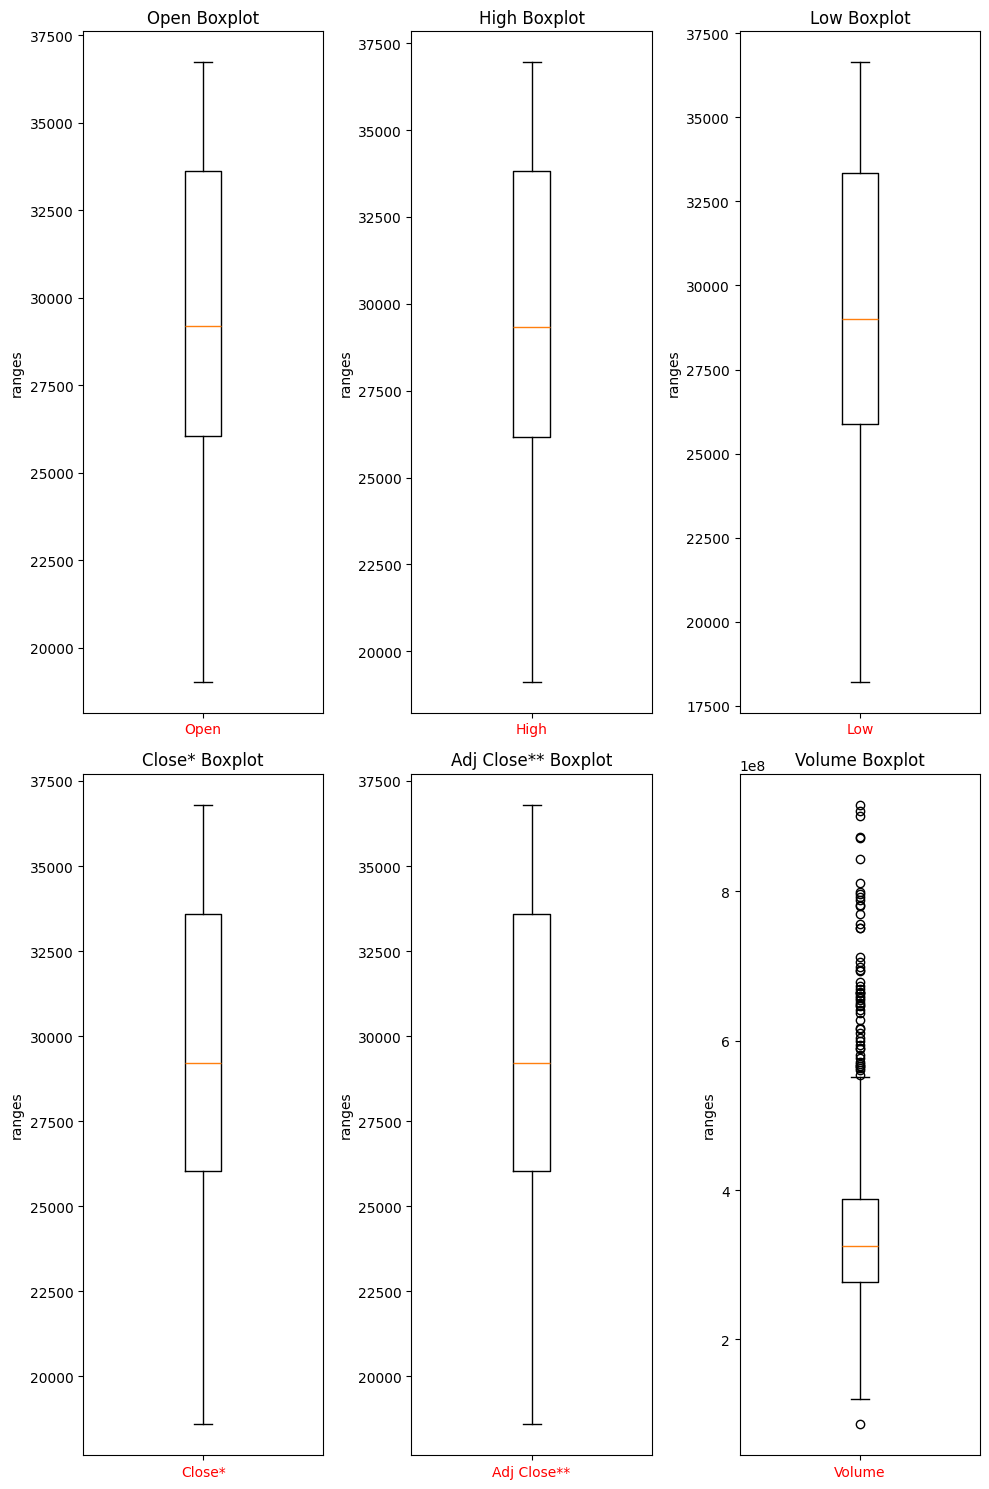

In [14]:
boxplot_per_feature(2, 3, df)

In [15]:
def times_series_plot(n, m, dataset, time_col):
    fig, axes = plt.subplots(n, m, figsize=(15, 10))
    ax = axes.flatten()
    
    # Ensure the time column is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(dataset[time_col]):
        dataset[time_col] = pd.to_datetime(dataset[time_col])
    
    # Plot each feature against time
    for i, feature in enumerate(numerical_features):
        ax[i].plot(dataset[time_col], dataset[feature])
        ax[i].set_xlabel('Date')  # Changed from set_xticklabels
        ax[i].set_ylabel('Ranges')
        ax[i].set_title(f'{feature} time series plot')
        
        # Rotate date labels for better readability
        ax[i].tick_params(axis='x', rotation=45)
        
        # # Optional: Format the date display
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax[i].xaxis.set_major_locator(mdates.AutoDateLocator())
    
    # Hide any empty subplots
    for i in range(len(numerical_features), len(ax)):
        ax[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

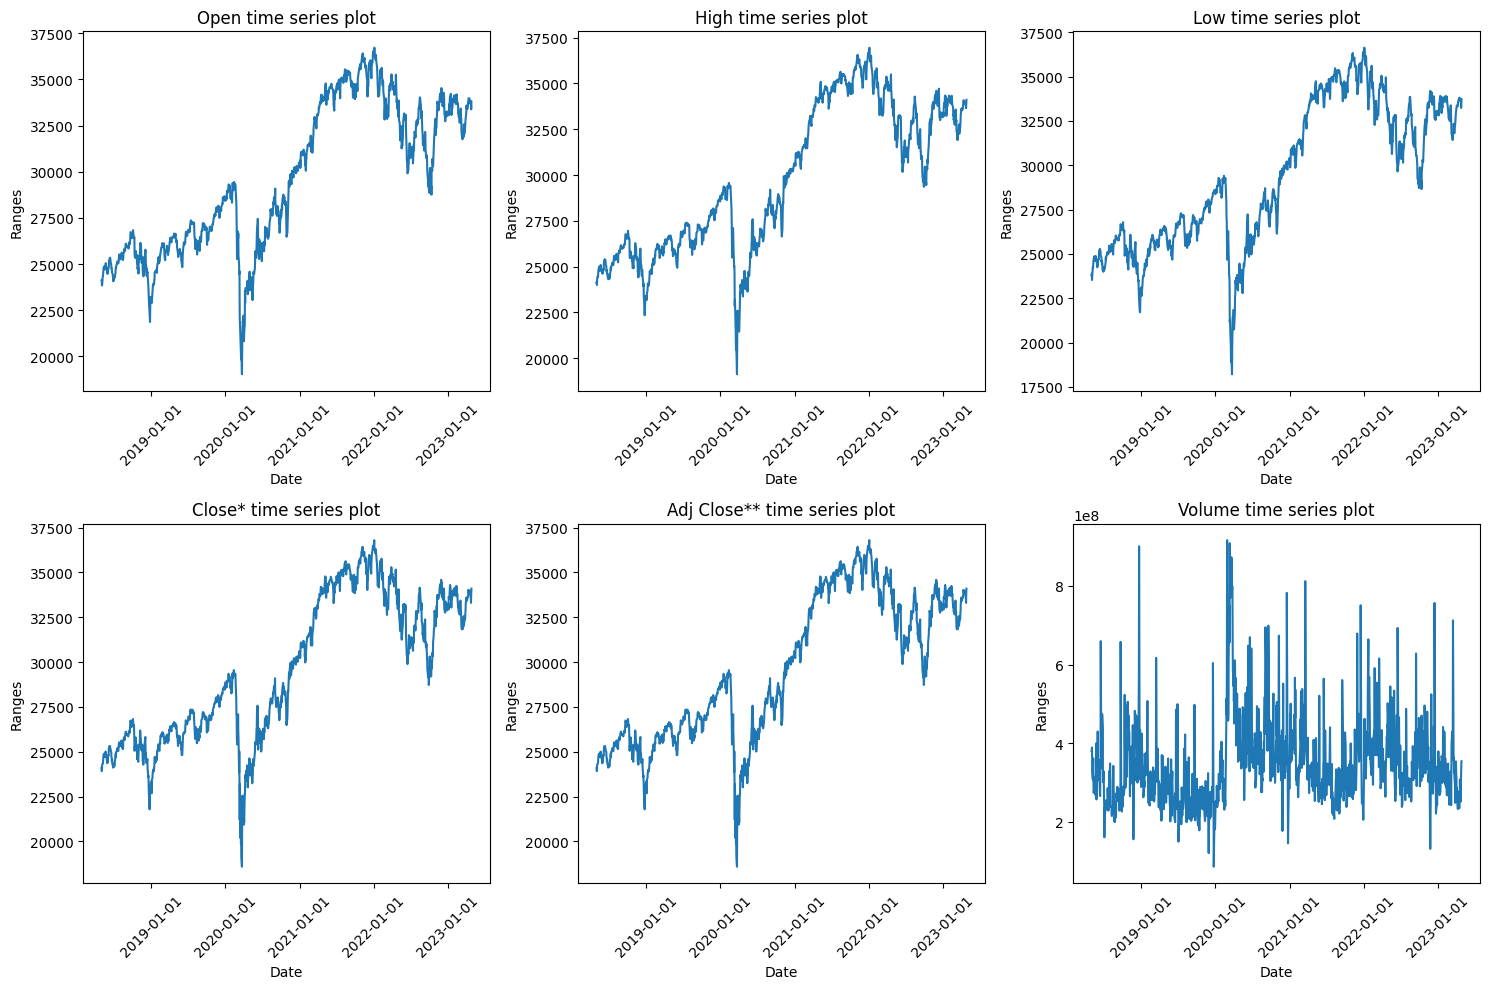

In [16]:
times_series_plot(2, 3, df , 'Date')

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
correlations = df[numerical_features].corr()

In [18]:
correlations

,Open,High,Low,Close*,Adj Close**,Volume
Open,1.000000,0.999043,0.998626,0.997592,0.997592,-0.088002
High,0.999043,1.000000,0.998198,0.998682,0.998682,-0.073388
Low,0.998626,0.998198,1.000000,0.998839,0.998839,-0.115077
Close*,0.997592,0.998682,0.998839,1.000000,1.000000,-0.096766
Adj Close**,0.997592,0.998682,0.998839,1.000000,1.000000,-0.096766
Volume,-0.088002,-0.073388,-0.115077,-0.096766,-0.096766,1.000000


In [23]:
df

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000
...,...,...,...,...,...,...,...
1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,24357.32,307670000
1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,24262.51,329480000
1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,23930.15,389240000
1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,23924.98,385350000


In [29]:
X= df.iloc[:,:-1]
y = df.iloc[: , -1]

In [32]:
split_point = int(len(X) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]